In [1]:
import numpy as np
import pandas as pd

import numpy as np
from pandas.tseries.offsets import BDay
import math
import random

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
%matplotlib inline

from pyfinance import TSeries

from hurst import compute_Hc, random_walk

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from hurst import compute_Hc, random_walk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [2]:
from __future__ import print_function

import pybacktest  # obviously, you should install pybacktest before importing it
import pandas as pd

In [3]:
import pickle

In [4]:
filename = 'model_no0_basic.sav'
model_basic = pickle.load(open(filename, 'rb'))
X_basic = pd.read_pickle('model_0_Xtest.pkl')
y_basic = pd.read_pickle('model_0_ytest.pkl')
y_pred = model_basic.predict(X_basic)
X_basic['signal'] = y_pred

In [5]:
main = pd.read_csv('btc hourly dataset/Bitfinex_BTCUSD_1h-3.csv')
main['Date'] = pd.to_datetime(main['Date'],  format='%Y-%m-%d %I-%p')
main = main.sort_values(by='Date').set_index('Date')


In [6]:
ohlc = main.rename(columns={'Open':'O', 'High':'H', 'Low':'L', 'Close':'C'}).drop(columns=['Symbol', 'Volume BTC', 'Volume USD']).replace([np.inf, -np.inf], 0).fillna(0)

ohlc = ohlc.loc[X_basic.index]

In [7]:

main['range'] = 100*(main['High'] - main['Low'])/main['Low']
main['adj_close'] = main['Close'] / (main['High']*0.5 + main['Low']*0.5)
main['adj_close'] = main['adj_close'].replace([np.inf, -np.inf, 0], 0)
main = main.rename(columns={'Close':'price'})


main = main.drop(columns=['Symbol','Volume BTC']).rename(columns={'Volume USD':'volume'})
main['volume_sma_5' ] = main['volume'].rolling(5).mean()
main['volume_sma_20' ] = main['volume'].rolling(20).mean()
main['volume_sma_50' ] = main['volume'].rolling(50).mean()
main['volume_sma_500' ] = main['volume'].rolling(500).mean()

main['volume_roc' ] = main['volume'].pct_change().fillna(0)
main['volume_roc_5' ] = main['volume'].pct_change(5).fillna(0)
main['volume_roc_20' ] = main['volume'].pct_change(20).fillna(0)
main['volume_roc_50' ] = main['volume'].pct_change(50).fillna(0)
main['volume_roc_500' ] = main['volume'].pct_change(500).fillna(0)


main['returns'] = main.price.pct_change().fillna(0)

main=main.drop(columns=['Open', 'High', 'Low'])


In [15]:
X_basic['actual'] = y_basic

In [16]:
X_basic['profit'] = X_basic.actual * X_basic.signal

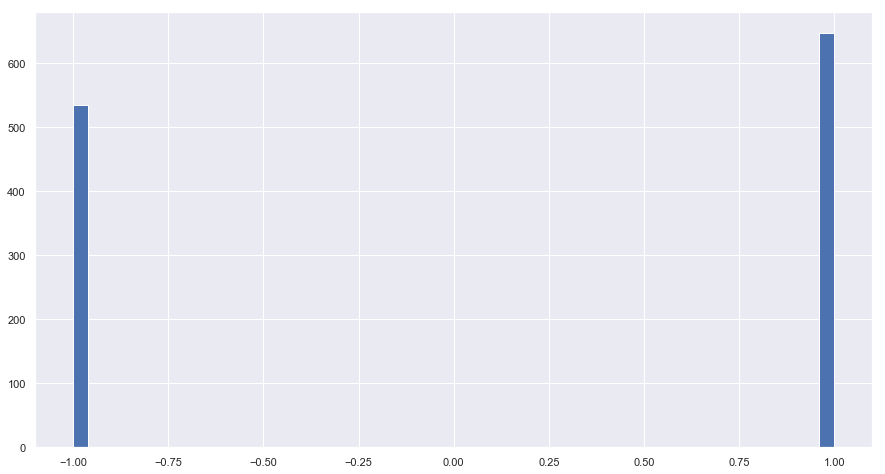

In [35]:
X_basic[X_basic.returns > 0.0001].profit.hist(bins=50)

In [52]:
short_ma = 50
long_ma = 200

#ms = X_basic.price.rolling(short_ma).mean()
#ml = X_basic.price.rolling(long_ma).mean()



In [20]:
sell=short= (X_basic.returns > (X_basic.returns.mean() )) & (X_basic.volume_sma_5 > (X_basic.volume_sma_5.mean() + X_basic.volume_sma_5.std() * 2  )) #&  #
buy = cover =  (X_basic.returns < (X_basic.returns.mean() )) & (X_basic.volume_sma_5 > (X_basic.volume_sma_5.mean()  + X_basic.volume_sma_5.std() * 2 ))  #& 

In [21]:
buy = buy.replace([np.inf, -np.inf], 0).fillna(0)
sell = sell.replace([np.inf, -np.inf], 0).fillna(0)


In [22]:
buy[buy==True].shape

(54,)

In [23]:
sell[sell==True].shape

(52,)

In [24]:
# Open buy if ML said buy and volume condition met
# Sell/close postion if ML says close and condition met

In [25]:

print('>  Short MA\n%s\n' % ms.tail())
print('>  Long MA\n%s\n' % ml.tail())
print('>  Buy/Cover signals\n%s\n' % buy.tail())
print('>  Short/Sell signals\n%s\n' % sell.tail())

NameError: name 'ms' is not defined

In [26]:
bt = pybacktest.Backtest(locals(), 'ma_cross')


In [27]:
bt.trades

,pos,price,vol
Date,,,
2019-08-07 02:00:00,-1.0,11516.00,-1.0
2019-08-07 16:00:00,1.0,11685.00,2.0
2019-08-07 18:00:00,-1.0,11780.00,-2.0
2019-08-07 19:00:00,1.0,11734.00,2.0
2019-08-07 20:00:00,-1.0,11800.00,-2.0
2019-08-08 09:00:00,1.0,11947.00,2.0
2019-08-10 13:00:00,-1.0,11426.00,-2.0
2019-08-10 15:00:00,1.0,11410.00,2.0
2019-08-10 16:00:00,-1.0,11416.00,-2.0


In [28]:
print(list(filter(lambda x: not x.startswith('_'), dir(bt))))
print('\n>  bt.signals\n%s' % bt.signals.tail())
print('\n>  bt.trades\n%s' % bt.trades.tail())
print('\n>  bt.positions\n%s' % bt.positions.tail())
print('\n>  bt.equity\n%s' % bt.equity.tail())
print('\n>  bt.trade_price\n%s' % bt.trade_price.tail())

['dataobj', 'default_price', 'eqplot', 'equity', 'name', 'ohlc', 'plot_equity', 'plot_trades', 'positions', 'prices', 'report', 'run_time', 'signals', 'sigplot', 'stats', 'summary', 'trade_price', 'trades', 'trdplot']

>  bt.signals
                       Buy  Cover   Sell  Short
Date                                           
2019-12-15 14:00:00  False  False  False  False
2019-12-15 15:00:00  False  False  False  False
2019-12-15 16:00:00  False  False  False  False
2019-12-15 17:00:00  False  False  False  False
2019-12-15 18:00:00  False  False  False  False

>  bt.trades
                     pos    price  vol
Date                                  
2019-11-22 14:00:00  1.0  7084.00  2.0
2019-11-22 16:00:00 -1.0  7155.90 -2.0
2019-11-25 02:00:00  1.0  6813.20  2.0
2019-11-25 03:00:00 -1.0  6833.70 -2.0
2019-11-25 04:00:00  1.0  6761.03  2.0

>  bt.positions
Date
2019-11-22 13:00:00    1.0
2019-11-22 15:00:00   -1.0
2019-11-25 01:00:00    1.0
2019-11-25 02:00:00   -1.0
2019-11-25 03:

In [29]:
bt.summary()

--------------------------------------------------------------
|  Backtest(ma_cross, 2019-29-12 19:41 Korea Standard Time)  |
--------------------------------------------------------------

backtest:
  days: 109
  from: '2019-08-07 16:00:00'
  to: '2019-11-25 04:00:00'
  trades: 57
performance:
  PF: 0.732
  RF: -0.4575
  averages:
    gain: 167.3045
    loss: -537.7582
    trade: -42.9774
  payoff: 0.3111
  profit: -2449.71
  winrate: 0.7018
risk/return profile:
  MPI: -0.2902
  UPI: -0.0204
  WCDD (monte-carlo 0.99 quantile): 6235.0394
  maxdd: 5354.96
  sharpe: -1.0167
  sortino: -0.6146

--------------------------------------------------------------


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b35c7dfc18>)

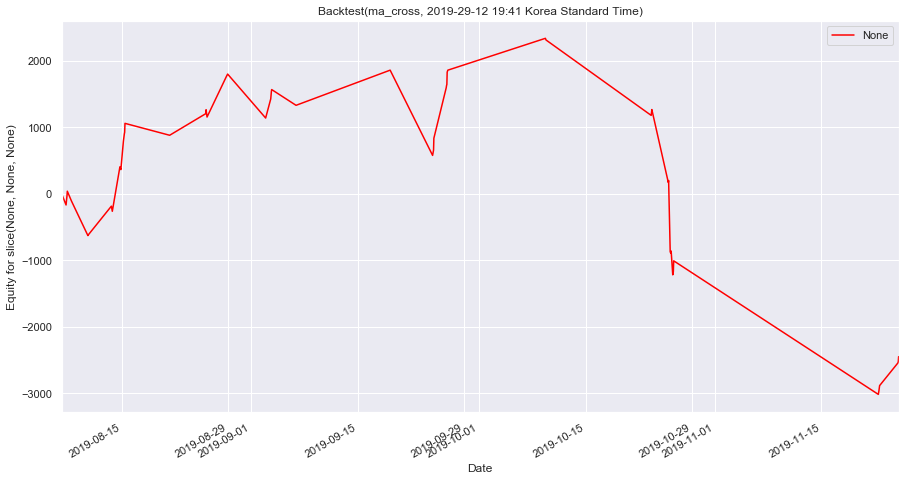

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

bt.plot_equity()

NameError: name 'short_ma' is not defined

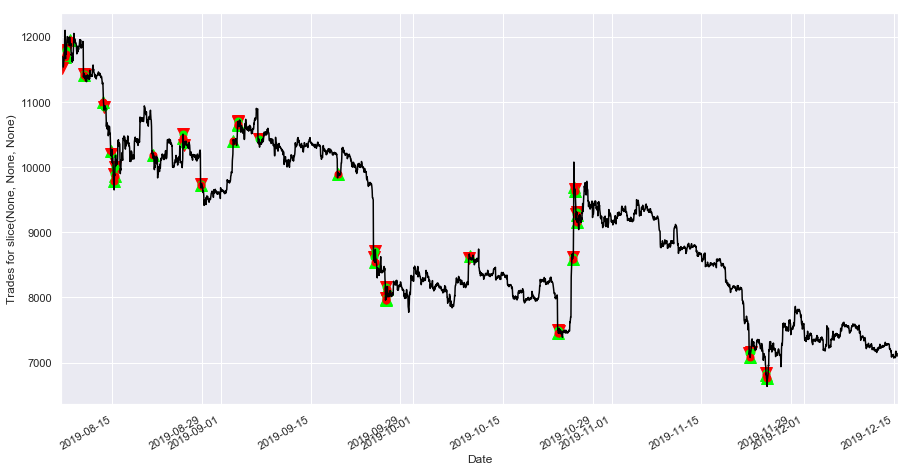

In [31]:
bt.plot_trades()
ohlc.C.rolling(short_ma).mean().plot(c='green')
ohlc.C.rolling(long_ma).mean().plot(c='blue')
plt.legend(loc='upper left')
pass